In [1]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize as wt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

###Functions 

In [2]:
#@title Function for Creation of Complex punctuation 
def listenhancer(lst,lists):
  # lst = ['a','b']
  # lists = ['c','d']
  res=[]
  # res.append(lst)
  # res.append(lists)
  for i in lst:
    res.append(i)
    for j in lists:
      res.append(j)
  for i in lst:
    for j in lists:
      res.append(i+j)
  return res

In [3]:
#@title Punctuations
from string import punctuation
puns = list(punctuation)
print(puns)
print(len(puns))
pun=[]
pun = listenhancer(puns,puns)
print(pun)
print(len(pun))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
32
['!', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '"', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '#', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '$', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '%', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '&',

In [4]:
from nltk.tokenize import word_tokenize as wt 
def cleaning(Datas):
  lower = []
  tokens = []
  cleaned_tokens=[]
  tokens = wt(Datas)
  for i in tokens:
    lower.append(i.lower())
  cleaned_tokens = [token for token in lower if token not in pun]
  new_data = ''
  for i in cleaned_tokens:
    new_data+=i
    new_data+=' '
  return new_data

  

In [5]:
def extract_ngrams(data,num):
  n_grams = ngrams(nltk.word_tokenize(data),num)
  return [' '.join(grams) for grams in n_grams]

In [7]:
data = open("/content/project_gutenberg.txt","r",encoding='utf8').read()
data.lower()

'the project gutenberg ebook of the adventures of sherlock holmes\nby sir arthur conan doyle\n(#15 in our series by sir arthur conan doyle)\n\ncopyright laws are changing all over the world. be sure to check the\ncopyright laws for your country before downloading or redistributing\nthis or any other project gutenberg ebook.\n\nthis header should be the first thing seen when viewing this project\ngutenberg file.  please do not remove it.  do not change or edit the\nheader without written permission.\n\nplease read the "legal small print," and other information about the\nebook and project gutenberg at the bottom of this file.  included is\nimportant information about your specific rights and restrictions in\nhow the file may be used.  you can also find out about how to make a\ndonation to project gutenberg, and how to get involved.\n\n\n**welcome to the world of free plain vanilla electronic texts**\n\n**ebooks readable by both humans and by computers, since 1971**\n\n*****these ebooks 

In [8]:
cleaned_data=cleaning(data)

In [9]:
monograms = extract_ngrams(data,1)
len(monograms)

403634

In [10]:
#@title Token Count
print("ANS 1 : The totla number of Tokens in the document = "+str(len(monograms)))

ANS 1 : The totla number of Tokens in the document = 403634


####Result:
---
From this ans we can get the information about the number of total tokens present in the corpus and can then use this information for the proving of Zipf's law as well as prediction of a word from the given word.

In [11]:
fdd = nltk.FreqDist(monograms)

In [12]:
fdd.tabulate()

                                               the                                                  ,                                                  .                                                 of                                                and                                                 to                                                 in                                                  a                                                was                                                 ''                                                 ``                                               that                                                  I                                                 it                                                for                                                 by                                                 as                                                The                                               with                                

In [13]:
#@title Token Frequency Distribution
print("ANS 2 : The Frequency Distribution of each words : \n")
str(fdd.pprint())

ANS 2 : The Frequency Distribution of each words : 

FreqDist({'the': 25251, ',': 24216, '.': 17076, 'of': 15165, 'and': 10117, 'to': 8489, 'in': 7270, 'a': 6684, 'was': 3962, "''": 3936, ...})


'None'

####Result:
---
From this ans we can get the frequency distribution for each words separately, which later can be used to prove the Zipf's Law.

In [14]:
import re
from operator import itemgetter    
freq = {}
frequency = {}
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', data)
 
for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
  freq[key]=value

In [15]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))


In [16]:
#@title Top 10 Ranked Words
freqs = []
wrds=[]
ranks=[]
rank = {}
rank_no = 1
for i in take(10,freq):
  rank[rank_no] = i
  wrds.append(i)
  ranks.append(rank_no)
  rank_no+=1
  freqs.append(freq[i])
  print(i+" : "+str(freq[i]))

the : 25261
and : 10139
was : 3959
that : 3331
The : 2672
for : 2528
with : 2219
had : 1966
his : 1867
were : 1831


In [17]:
freqs

[25261, 10139, 3959, 3331, 2672, 2528, 2219, 1966, 1867, 1831]

In [18]:
ranks

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

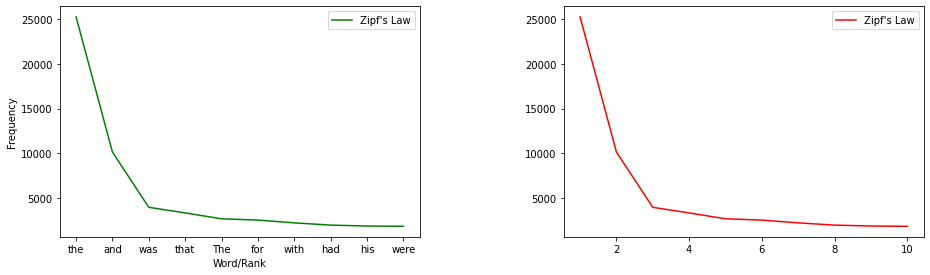

In [19]:
import matplotlib.pyplot as plt
plt.subplots_adjust(left=2,
                    bottom=0.1, 
                    right=4, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


plt.xlabel("Word")
plt.ylabel("Frequency")
plt.subplot(1,2,1)
plt.plot(wrds,freqs,label="Zipf's Law",color="green")
plt.legend()
plt.xlabel("Word/Rank")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.plot(ranks,freqs,label="Zipf's Law",color="red")
plt.legend()
plt.show()

####*Result* : 
---
  From the above graphs we can get a relation of **f** being ***inversely proportional to r*** where ***f*** represents ***Frequency*** and ***r*** represents ***Rank***.

In [20]:
def correct_misspelled(misspelled):
  suggestions = []
  for i in words:
    if ((misspelled in i) or (i in misspelled)):
      if abs(len(misspelled or i) - len(misspelled and i)) <=3:
        if (i or misspelled) not in suggestions:
          suggestions.append(i or misspelled)
  return suggestions

In [21]:
def sort_by_rank(suggestion):
  new_suggestions=[]
  for i in range(len(suggestion)):
    maxs = freq[suggestion[i]]
    maxstr = suggestion[i]
    for j in range(i,len(suggestion)):
      if maxs < freq[suggestion[j]]:
        maxs = freq[suggestion[j]]
        maxstr = suggestion[j]
    new_suggestions.append(maxstr)
    return new_suggestions

In [22]:
#@title Suggesting Words without rank
string = input("Enter a word : ")
print("Suggestions : \n")
print(correct_misspelled(string))

Enter a word : Tha
Suggestions : 

['That', 'Thank', 'Thames', 'Thanks']


In [23]:
#@title Suggesting based on rank
print("Suggestion Based on Rank : ")
print(sort_by_rank(correct_misspelled(string)))

Suggestion Based on Rank : 
['That']


####Result: 
---
From this one we are able to get all the words containing the searched word and will suggest the word which is closest to the misspelled words.